In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/data (1).csv')
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


In [4]:
#Finding missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64


In [5]:
#Replace missing values with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
890,928,1017,Asus,ROG Zephyrus G14 2023 GA402XV-N2034WS Gaming L...,189990,89.000000,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",32GB,DDR5,1TB,SSD,8GB NVIDIA GeForce RTX 4060,14.0,2560.0,1600.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


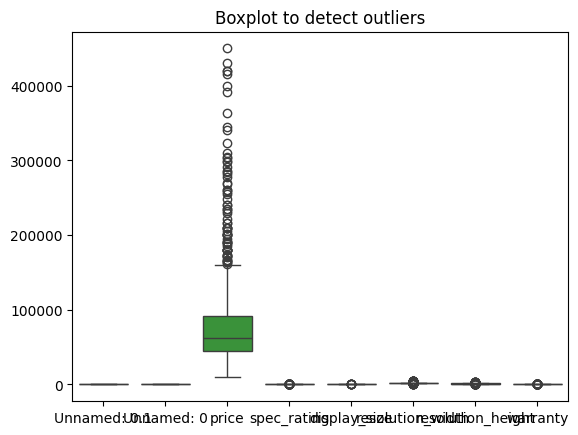

In [6]:
#Check for outliers using a boxplot
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot to detect outliers")
plt.show()

In [7]:
#Drop outliers
from scipy.stats import zscore
df = df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
df

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,925,1014,Acer,Aspire 5 A515-58M NX.KHGSI.002 Gaming Laptop,56990,69.323529,13th Gen Intel Core i5 1335U,"10 Cores (2P + 8E), 12 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,15.6,1920.0,1080.0,Windows 11 OS,1
888,926,1015,Asus,Vivobook 15X 2023 K3504VAB-NJ321WS Laptop,44990,69.323529,13th Gen ‎Intel Core i3 1315U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Integrated Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
889,927,1016,Asus,TUF A15 FA577RM-HQ032WS Laptop,110000,71.000000,6th Gen AMD Ryzen 7 6800H,"Octa Core, 16 Threads",16GB,DDR,1TB,SSD,6GB NVIDIA GeForce RTX 3060,15.6,2560.0,1440.0,Windows 11 OS,1
891,929,1018,Asus,TUF Gaming F15 2023 FX507VU-LP083WS Gaming Laptop,129990,73.000000,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,512GB,SSD,6GB NVIDIA GeForce RTX 4050,15.6,1920.0,1080.0,Windows 11 OS,1


In [10]:
#Perform label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to all object (categorical) columns
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

# Print the transformed DataFrame
print(df.head())



   Unnamed: 0.1  Unnamed: 0  brand  name  price  spec_rating  processor  CPU  \
0             0           0      9   598  49900    73.000000        100   16   
1             1           1      9    38  39900    60.000000         31   15   
2             2           2      1   405  26990    69.323529         12   14   
3             3           3     14   729  59729    66.000000         36    5   
4             4           4      2   353  69990    69.323529        148   18   

   Ram  Ram_type  ROM  ROM_type  GPU  display_size  resolution_width  \
0    4         2    4         1   12          15.6            1920.0   
1    4         2    4         1  109          15.6            1920.0   
2    4         2    4         1  106          14.0            1920.0   
3    1         8    4         1   96          14.0            2240.0   
4    4         2    2         1   78          13.3            2560.0   

   resolution_height  OS  warranty  
0             1080.0   9         1  
1           

Correlation Matrix:
                    Unnamed: 0.1  Unnamed: 0     brand      name     price  \
Unnamed: 0.1           1.000000    0.999677  0.016293 -0.010083  0.151926   
Unnamed: 0             0.999677    1.000000  0.016243 -0.009992  0.151062   
brand                  0.016293    0.016243  1.000000 -0.175503  0.010096   
name                  -0.010083   -0.009992 -0.175503  1.000000  0.071579   
price                  0.151926    0.151062  0.010096  0.071579  1.000000   
spec_rating            0.074279    0.072698  0.023491  0.020910  0.526282   
processor              0.096325    0.096550 -0.109344  0.044452  0.088552   
CPU                   -0.049097   -0.047978  0.027673  0.008279 -0.295763   
Ram                   -0.006662   -0.005905 -0.009548 -0.157704 -0.501001   
Ram_type               0.054075    0.053573  0.059581 -0.135479  0.271799   
ROM                   -0.037496   -0.038807  0.036578 -0.012855 -0.360824   
ROM_type               0.055018    0.054177  0.004264  

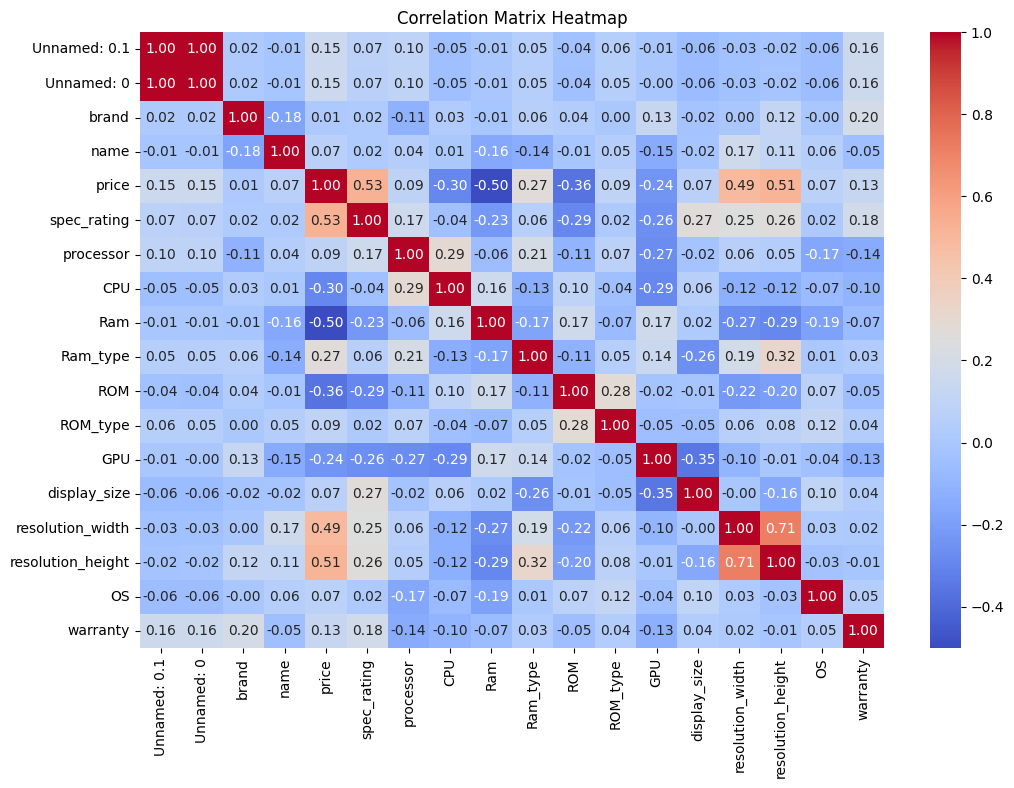

In [11]:
#Check correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



Outcome Counts:
 brand
9     175
14    157
3     149
6      98
1      78
15     60
20     27
12     15
2      10
26      7
7       6
8       6
13      5
22      4
27      4
21      3
5       3
19      3
25      3
11      2
16      2
10      2
0       2
24      1
4       1
23      1
17      1
18      1
Name: count, dtype: int64


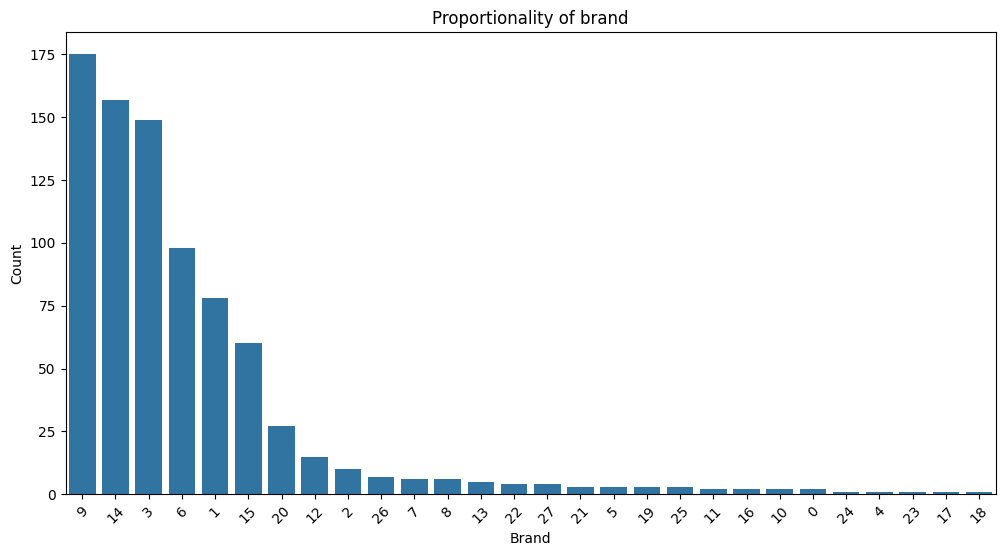

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Checking the proportionality of 'brand' as the target variable
target_column = 'brand'  # Replace with the column you'd like to analyze

# Check the value counts for each category
outcome_counts = df[target_column].value_counts()
print("Outcome Counts:\n", outcome_counts)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=target_column, order=outcome_counts.index)
plt.title(f"Proportionality of {target_column}")
plt.xlabel(target_column.capitalize())
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [13]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'price' is the target variable
target_column = 'price'  # Change this if your target variable is different

# Separate independent variables (X) and target variable (y)
X = df.drop(columns=[target_column])  # Drop the target column to get independent features
y = df[target_column]  # Target variable

# Verify the shapes of X and y
print("Shape of X (independent variables):", X.shape)
print("Shape of y (target variable):", y.shape)

# Optionally, display the first few rows of independent variables
print("Independent Variables (X):")
print(X.head())


Shape of X (independent variables): (826, 17)
Shape of y (target variable): (826,)
Independent Variables (X):
   Unnamed: 0.1  Unnamed: 0  brand  name  spec_rating  processor  CPU  Ram  \
0             0           0      9   598    73.000000        100   16    4   
1             1           1      9    38    60.000000         31   15    4   
2             2           2      1   405    69.323529         12   14    4   
3             3           3     14   729    66.000000         36    5    1   
4             4           4      2   353    69.323529        148   18    4   

   Ram_type  ROM  ROM_type  GPU  display_size  resolution_width  \
0         2    4         1   12          15.6            1920.0   
1         2    4         1  109          15.6            1920.0   
2         2    4         1  106          14.0            1920.0   
3         8    4         1   96          14.0            2240.0   
4         2    2         1   78          13.3            2560.0   

   resolution_heig

In [14]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalization (Min-Max Scaling)
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(df), columns=df.columns)
print("\nNormalized Data (First 5 Rows):\n", df_normalized.head())

# Standardization (Z-score Scaling)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("\nStandardized Data (First 5 Rows):\n", df_standardized.head())



Normalized Data (First 5 Rows):
    Unnamed: 0.1  Unnamed: 0     brand      name     price  spec_rating  \
0      0.000000    0.000000  0.333333  0.797333  0.156259     0.520000   
1      0.001075    0.000981  0.333333  0.050667  0.116100     0.000000   
2      0.002151    0.001963  0.037037  0.540000  0.064254     0.372941   
3      0.003226    0.002944  0.518519  0.972000  0.195731     0.240000   
4      0.004301    0.003925  0.074074  0.470667  0.236938     0.372941   

   processor       CPU   Ram  Ram_type  ROM  ROM_type       GPU  display_size  \
0   0.602410  0.666667  1.00  0.181818  0.8       1.0  0.105263         0.575   
1   0.186747  0.625000  1.00  0.181818  0.8       1.0  0.956140         0.575   
2   0.072289  0.583333  1.00  0.181818  0.8       1.0  0.929825         0.175   
3   0.216867  0.208333  0.25  0.727273  0.8       1.0  0.842105         0.175   
4   0.891566  0.750000  1.00  0.181818  0.4       1.0  0.684211         0.000   

   resolution_width  resolution_he

Mean Squared Error: 467215741.5333969
R-squared Value: 0.6714043901426079


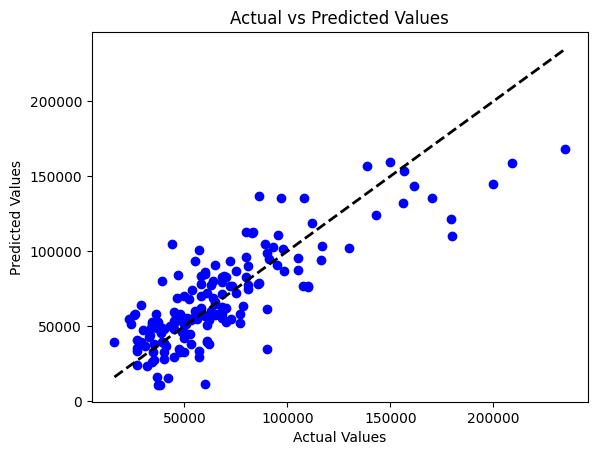

In [15]:
#Implement linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Step 1: Prepare the data
# Assuming df is your DataFrame and 'price' is the target variable
target_column = 'price'  # Replace with your target variable
X = df.drop(columns=[target_column])  # Independent variables
y = df[target_column]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Linear Regression model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

print("Mean Squared Error:", mse)
print("R-squared Value:", r2)

# Optional: Visualize Actual vs Predicted
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line for reference
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
